<a href="https://colab.research.google.com/github/carlocamilloni/Structural-Bioinformatics/blob/main/Notebooks/report_6_QM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REPORT: Simple Quantum Chemistry calculation using CP2K

YOUR NAME

In [ ]:
from datetime import date

today = date.today()
print(today)

## SETUP and PRELIMINARY stuff

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# set the path to your local task folder
local_path='/content/drive/MyDrive/Structural_Bioinformatics/Task6'
%cd {local_path}

## Hydrogen atom

Try the following representations:

1.	Isosurface, Draw: solid surface, isovalue 0.25 (a very high value)
2.	Isosurface, Draw: solid surface, Material: transparent, isovalue 0.1
3.	The same decreasing isovalue to 0.01
4.	..


You can see that the electron density is larger than 0 even at 2.5 angstrom from the nucleus (the box is 5 angstrom large). This means that there is a small chance that the electron can be relatively far from its nucleus.


## Carbon atom

If you look at how the shape of the carbon density is in space, does this makes sense to you?

If you open the log file after the iterative calculation of the density there is an analysis of the molecular orbitals. Alpha orbitals are spin-up and beta spin-down. Remember that 1S is not considered. So the first MO is 2S, then 2Px, 2Py, 2Pz, 3S, … the eigenvalue is the energy of the electron in that orbital and the occupation is what is the probability of finding an electron in that orbital.

 ALPHA MO EIGENVALUES AND MO OCCUPATION NUMBERS

### MO index          MO eigenvalue [a.u.]            MO occupation
         1                     -0.476694                 1.000000
         2                     -0.168137                 0.333333
         3                     -0.168137                 0.333333
         4                     -0.168137                 0.333333
         5                      0.326836                 0.000000
### Sum                                                    2.000000

  Fermi energy:                -0.168796



 BETA MO EIGENVALUES AND MO OCCUPATION NUMBERS

### MO index          MO eigenvalue [a.u.]            MO occupation
         1                     -0.476694                 1.000000
         2                     -0.168137                 0.333333
         3                     -0.168137                 0.333333
         4                     -0.168137                 0.333333
         5                      0.326836                 0.000000
### Sum                                                    2.000000

If you think about Boltzmann probability

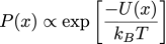

if two orbitals have the same energy, what is their relative probability?


**Answer:**

## Methane

Even if as you can guess we have now 8 electrons to simulate, this calculation is actually not that slower than the one of the single Carbon, this because this is a “closed shell” calculation, all Molecular Orbitals are occupied and the density is much more stable.

Once the calculation is done, as before copy the Electron density on the workstation and look at it with VMD.

What happen to the density for example with respect to a single Carbon atom?

What are you looking at?


**Answer:**

## Ionic bond between NA and CL

In this exercise you will calculate the density and energy of the two atoms from far apart and getting close by. This will allow to calculate the interaction energy of the two atoms.

First make a Task4 subfolder for this simulation, you can name it `nacl`. Then copy in `nacl` from the repository (the folder `sb/Data/qm`) the file `NACL.txt`.


In this case the coordinates of the system are written inside the input file NACL.txt, the box side is 16 Ang:

In [ ]:
%cat NACL.txt

At the beginning the atoms are placed at a distance of 8 angstrom (12-4) along the x direction.

Furthermore, to make the calculation more accurate we will be using 9 valence electrons for NA (all the 2p8 + 3s1) and 7 electrons for CL (3s2 + 3p5).

The goal is to run some energy calculations moving the two atoms closer and closer in space, and make a table like:

```
DISTANCE - ENERGY
8		   xxx
…		   …
```

Start by running the first simulation (it can take 10 minutes):


In [ ]:
%cd {local_path}/nacl

"""
This will calculate the energy and the electronic density of a NA and CL atoms
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "nacl-8"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path
calc.parse("NACL.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

At this point you can change the distance between the two atoms to make them closer


To edit the file, go the page with the list of files, select it and then click (at the top) on duplicate, and then rename it.
Now to actually edit it is enough to click on it, it will open a new page where you can edit it and save it.

Decrease the distance by no more than 1 angstrom every time, so that the simulation, by restarting from the results of the previous one will run faster

    &COORD
       Na   x1  8.000000  8.000000
       Cl    x2 8.000000  8.000000
    &END COORD

Change also the "project_name=nacl-xx" setting the new distance in place of xx so that your files don't get overwritten

In [ ]:
"""
This will calculate the energy and the electronic density of a NA and CL atoms as a function of their relative distance
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "nacl-xx"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path
calc.parse("NACL.txt")
calc.run()

Once it is finished find the value for the energy and add it to your table.

-	PLOT the ENERGY vs DISTANCE
-	What is the energy difference corresponding to the ionic bond?
-	How does the density look like when the atoms are far and close?
-	How does it compare with a covalent bond (for example with respect to Methane)?



In [ ]:
# the following line will print the energy from all the nacl-xx.out files you produced
!for i in nacl*.out; do echo $i; grep ENERGY $i | grep Total; done

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# write here the distances for which you ran the calculation
x=[1.0,2.0,3.0,4.0]
# write here the corresponding energy values
e=[-59,-60,-61,-62]

# check the matplotlib plot method to add axis labels and points
plt.plot(x, e)
plt.show()

## MD of water and Proton Transfer

How does the proton transfer happen?
Are the water molecules in some special arrangement?


**Answer:**

## Electronic density for a small protein

Add here a Figure with the electron density of the protein: